In [52]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

In [53]:
import csv
df = pd.read_csv('Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

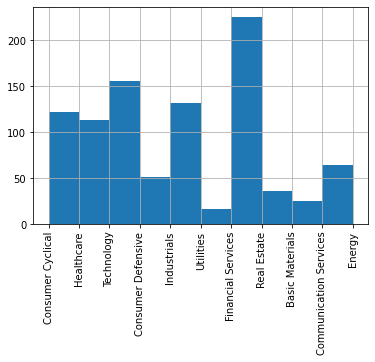

In [54]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [55]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [56]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [57]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [58]:
len(rows)

476

In [59]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


In [60]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               93
Technology                89
Consumer Cyclical         79
Financial Services        68
Healthcare                52
Communication Services    29
Basic Materials           20
Consumer Defensive        19
Energy                    15
Real Estate               11
Utilities                  1
Name: sector, dtype: int64

In [61]:
#df for each sector

df_basic_materials = df.loc[df['sector'] == 'Basic Materials']
df_communication = df.loc[df['sector'] == 'Communication Services']
df_consumer_c = df.loc[df['sector'] == 'Consumer Cyclical']
df_consumer_d = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_financial = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_real_estate = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilites = df.loc[df['sector'] == 'Utilities']

In [26]:
#sectors used in aggressive model: tech, healthcare, real estate, industrials, consumer cyclical

# Tech Sector

## Filtering Stocks based on Sharpe Ratio

In [62]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [63]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [64]:
sharpe_list = []
for i in range(len(df_tech)):
    each = df_tech.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [65]:
sharpe_list

[0.6,
 0.997,
 0.757,
 0.422,
 0.829,
 0.376,
 0.165,
 0.425,
 0.614,
 0.54,
 0.528,
 0.737,
 0.463,
 0.065,
 0.199,
 0.512,
 0.682,
 1.37,
 1.049,
 0.086,
 0.48,
 0.841,
 0.143,
 0.367,
 0.179,
 0.466,
 0.283,
 -0.313,
 0.275,
 0.463,
 0.535,
 0.376,
 0.284,
 0.401,
 -0.256,
 0.435,
 0.807,
 0.898,
 0.181,
 -0.089,
 0.485,
 0.365,
 -0.011,
 0.084,
 0.398,
 0.493,
 0.461,
 0.093,
 0.558,
 0.671,
 0.113,
 0.683,
 0.667,
 0.543,
 0.546,
 0.534,
 0.372,
 0.302,
 0.652,
 0.03,
 0.038,
 0.143,
 0.085,
 0.482,
 0.764,
 0.211,
 0.291,
 -0.001,
 0.383,
 0.337,
 0.708,
 0.422,
 0.583,
 0.899,
 0.62,
 0.168,
 0.119,
 0.723,
 1.805,
 0.426,
 0.499,
 0.511,
 1.128,
 0.605,
 -0.082,
 0.041,
 0.695,
 0.025,
 0.071]

In [66]:
df_tech["sharpe"] = sharpe_list
df_tech

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_15020/505389931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.600
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,0.997
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.757
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.7600,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536,0.422
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,UEIC,Universal Electronics Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,32.0000,0.045029,4.192544e+08,...,1.707,0.1500,9.090909,18.746338,15.999999,999.00,0.162640,0.491506,-0.118525,-0.082
919,VSAT,"ViaSat, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,41.2500,-0.011116,3.029557e+09,...,0.478,0.2460,85.937500,86.297070,42.440039,999.00,0.155346,0.431753,-0.081127,0.041
923,WDAY,"Workday, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,216.5600,0.160951,5.414000e+10,...,0.117,0.1579,60.831463,1850.940200,115.161464,13.09,0.183305,0.383779,0.213788,0.695
928,WTRH,Waitr Holdings Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,0.4474,-0.264822,6.456787e+07,...,0.043,0.2000,-5.592500,10.404651,0.328108,999.00,-0.137611,1.128303,-0.461342,0.025


In [67]:
df2_tech = df_tech[df_tech["sharpe"] > 0.6]
df2_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,0.997
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.757
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.829
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.614
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.737
243,AOSL,Alpha and Omega Semiconductor L,Technology,Increase,Above Fair Price,UnderValued,No Data,49.2600,0.165397,1.299356e+09,...,2.612,0.1700,11.617925,18.859112,28.764485,999.00,0.330391,0.570794,0.201750,0.682
244,APPS,"Digital Turbine, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,43.8000,0.278657,4.232205e+09,...,0.530,0.5000,20.372091,82.641510,239.323247,999.00,0.285415,0.719036,1.325025,1.370
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.049
258,AUDC,AudioCodes Ltd.,Technology,Increase,Below Fair Price,OverValued,No Data,27.6750,0.234188,9.141052e+08,...,1.028,0.2500,16.875000,26.921206,29.306718,999.00,0.084842,0.446357,0.362672,0.841
381,DIOD,Diodes Incorporated,Technology,Increase,Above Fair Price,UnderValued,No Data,87.1300,0.131229,3.922401e+09,...,4.123,0.1500,14.919519,21.132670,43.564999,999.00,0.148053,0.401822,0.286506,0.807


## Correlation between Stocks

In [68]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

In [69]:
returns_list = []
for i in range(len(df2_tech)):
    each = df2_tech.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [70]:
returns_list

[Symbols          AMD
 Date                
 2017-03-23       NaN
 2017-03-24 -0.006526
 2017-03-27 -0.006526
 2017-03-28 -0.007252
 2017-03-29 -0.005801
 ...              ...
 2022-03-17  7.099348
 2022-03-18  7.227701
 2022-03-21  7.406091
 2022-03-22  7.323423
 2022-03-23  7.261059
 
 [1260 rows x 1 columns],
 Symbols         ANSS
 Date                
 2017-03-23       NaN
 2017-03-24 -0.008350
 2017-03-27 -0.008819
 2017-03-28 -0.003753
 2017-03-29 -0.000375
 ...              ...
 2022-03-17  1.904869
 2022-03-18  1.989024
 2022-03-21  1.914439
 2022-03-22  1.977672
 2022-03-23  1.874848
 
 [1260 rows x 1 columns],
 Symbols         EPAM
 Date                
 2017-03-23       NaN
 2017-03-24  0.005627
 2017-03-27  0.012627
 2017-03-28  0.023881
 2017-03-29  0.034450
 ...              ...
 2022-03-17  2.749520
 2022-03-18  3.041587
 2022-03-21  2.898572
 2022-03-22  3.166072
 2022-03-23  3.208756
 
 [1260 rows x 1 columns],
 Symbols             NTAP
 Date                    
 2017-

In [71]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,AMD,ANSS,EPAM,NTAP,QCOM,AOSL,APPS,ASML,AUDC,DIOD,...,MANT,MGIC,NSIT,ON,POWI,RIOT,RMBS,TTD,UCTT,WDAY
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-24,-0.006526,-0.008350,0.005627,-4.890087e-04,0.001936,-0.008149,-0.031579,0.023371,-0.005848,0.012648,...,-0.013009,0.025478,-0.006031,0.014706,0.006260,0.012012,0.009360,-0.027012,0.018205,0.018166
2017-03-27,-0.006526,-0.008819,0.012627,-1.110223e-16,-0.002640,-0.004657,-0.042105,0.026931,0.001462,0.004637,...,-0.024039,0.012739,-0.003860,0.003342,0.005477,0.045045,0.007800,0.005402,0.017555,0.017798
2017-03-28,-0.007252,-0.003753,0.023881,6.112469e-03,0.010033,-0.008149,-0.073684,0.035366,0.013158,-0.000843,...,-0.021210,0.006369,-0.015682,0.022059,0.017214,0.054054,0.010920,-0.014317,0.017555,0.027740
2017-03-29,-0.005801,-0.000375,0.034450,1.687038e-02,0.009681,0.006403,-0.010526,0.028556,0.010234,0.002530,...,-0.013009,0.006369,-0.010133,0.014706,0.012519,0.205105,0.007800,0.025932,0.031209,0.038174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,7.099348,1.904869,2.749520,1.112714e+00,1.690195,2.279977,41.873684,4.061910,2.953216,2.756324,...,1.498303,1.332484,1.602895,3.061497,1.923944,4.534535,1.311232,16.668829,1.871911,1.888180
2022-03-18,7.227701,1.989024,3.041587,1.192910e+00,1.710614,2.362049,44.305265,4.261260,2.973684,2.860034,...,1.394231,1.368153,1.618094,3.139706,2.036307,4.864865,1.436037,17.587250,1.910923,1.990058
2022-03-21,7.406091,1.914439,2.898572,1.163814e+00,1.738778,2.314319,43.115790,4.284863,2.982456,2.819140,...,1.454751,1.340128,1.639083,3.139706,1.975900,4.891892,1.434477,17.087520,1.824447,1.980729


<AxesSubplot:xlabel='Date'>

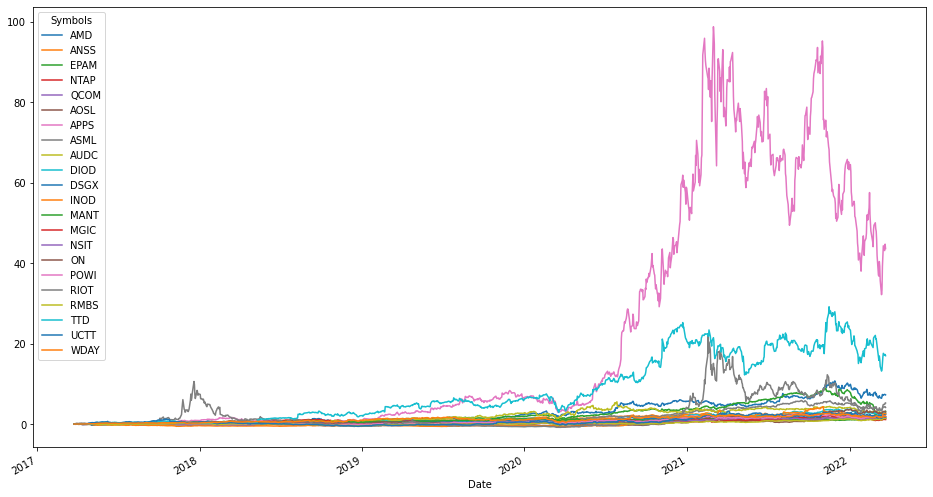

In [72]:
return_series_close.plot(figsize=(16,9))

In [73]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [74]:
highest.dropna(axis=1, how="all")

Symbols,AMD,APPS,RIOT,TTD
Date,,,,
2017-03-23,NaN,NaN,NaN,NaN
2017-03-24,NaN,NaN,NaN,NaN
2017-03-27,NaN,NaN,NaN,NaN
2017-03-28,NaN,NaN,NaN,NaN
2017-03-29,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-03-17,NaN,NaN,NaN,NaN
2022-03-18,NaN,NaN,NaN,NaN
2022-03-21,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

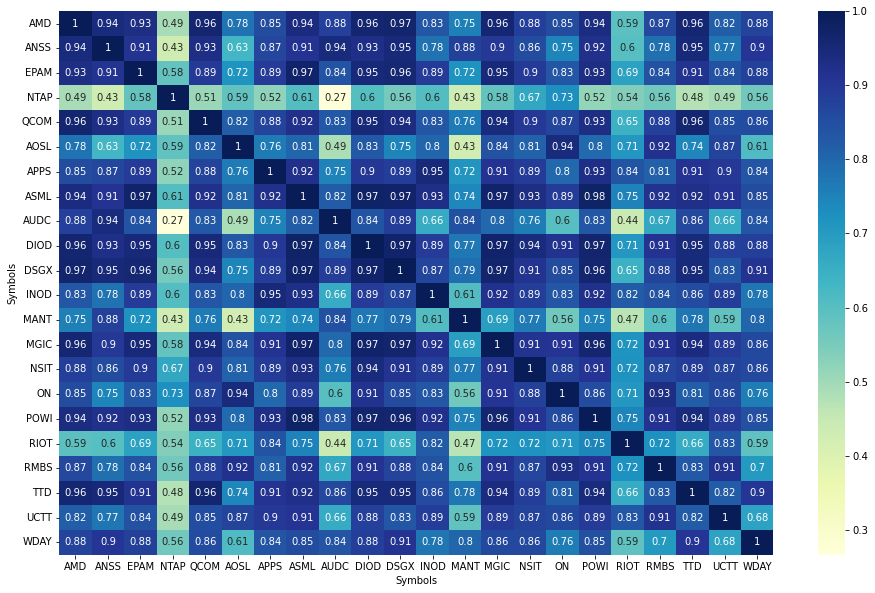

In [75]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [76]:
correlation = correlation[correlation < 0.1]
correlation

Symbols,AMD,ANSS,EPAM,NTAP,QCOM,AOSL,APPS,ASML,AUDC,DIOD,...,MANT,MGIC,NSIT,ON,POWI,RIOT,RMBS,TTD,UCTT,WDAY
Symbols,,,,,,,,,,,,,,,,,,,,,
AMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EPAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NTAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QCOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AOSL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUDC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF for Tech

In [77]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [78]:
indexes = []
for i in range(len(df2_tech)):
    each = df2_tech.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [79]:
chosen_tech_df = df2_tech.iloc[indexes]
chosen_tech_df #22 stocks for tech sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,0.997
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.757
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.829
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.614
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.737
243,AOSL,Alpha and Omega Semiconductor L,Technology,Increase,Above Fair Price,UnderValued,No Data,49.2600,0.165397,1.299356e+09,...,2.612,0.1700,11.617925,18.859112,28.764485,999.00,0.330391,0.570794,0.201750,0.682
244,APPS,"Digital Turbine, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,43.8000,0.278657,4.232205e+09,...,0.530,0.5000,20.372091,82.641510,239.323247,999.00,0.285415,0.719036,1.325025,1.370
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.049
258,AUDC,AudioCodes Ltd.,Technology,Increase,Below Fair Price,OverValued,No Data,27.6750,0.234188,9.141052e+08,...,1.028,0.2500,16.875000,26.921206,29.306718,999.00,0.084842,0.446357,0.362672,0.841
381,DIOD,Diodes Incorporated,Technology,Increase,Above Fair Price,UnderValued,No Data,87.1300,0.131229,3.922401e+09,...,4.123,0.1500,14.919519,21.132670,43.564999,999.00,0.148053,0.401822,0.286506,0.807


In [80]:
chosen_tech_df.to_csv("selected_stocks_tech.csv")

# Healthcare Sector

## Filtering Stocks based on Sharpe Ratio

In [81]:
sharpe_list = []
for i in range(len(df_healthcare)):
    each = df_healthcare.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [82]:
sharpe_list

[0.07,
 0.859,
 0.904,
 0.779,
 -0.181,
 -0.016,
 -0.029,
 0.379,
 0.609,
 -0.071,
 0.108,
 0.729,
 0.426,
 0.834,
 -0.002,
 0.403,
 0.268,
 0.684,
 0.582,
 0.543,
 0.589,
 0.06,
 0.218,
 0.429,
 0.332,
 0.081,
 0.346,
 0.824,
 -0.068,
 1.229,
 0.117,
 0.079,
 0.938,
 0.644,
 0.344,
 0.721,
 1.132,
 0.392,
 0.06,
 0.385,
 0.071,
 0.982,
 0.199,
 0.419,
 0.935,
 0.175,
 0.541,
 0.335,
 0.431,
 0.445,
 0.918,
 0.732]

In [83]:
df_healthcare["sharpe"] = sharpe_list
df_healthcare

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_15020/4048192744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_healthcare["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
30,BIIB,Biogen Inc.,Healthcare,Increase,Above Fair Price,UnderValued,Not Sustainable,210.0000,0.060577,3.084753e+10,...,10.2170,-0.0650,11.332973,20.553978,1.630096e+01,20.62,0.072686,0.458651,-0.051561,0.070
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.6100,0.171804,1.670966e+10,...,3.1770,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.859
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.5600,0.272290,4.151156e+10,...,8.7180,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.904
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.1600,0.183066,4.320561e+10,...,3.9290,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.779
212,WBA,"Walgreens Boots Alliance, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,46.1800,0.056427,3.989698e+10,...,2.9330,0.0293,9.054902,15.744970,8.511794e+00,18.38,0.086058,0.316630,-0.084159,-0.181
218,XRAY,DENTSPLY SIRONA Inc.,Healthcare,Increase,Below Fair Price,UnderValued,Not Sustainable,55.1800,0.044138,1.206273e+10,...,1.9020,0.2497,17.297806,29.011568,5.830732e+01,20.12,0.129819,0.322027,0.004033,-0.016
230,AGIO,"Agios Pharmaceuticals, Inc.",Healthcare,Increase,Below Fair Price,UnderValued,No Data,29.0000,-0.007540,1.574947e+09,...,24.9500,0.3900,-4.769737,1.162325,7.984002e+01,999.00,0.201539,0.510859,-0.078755,-0.029
255,ATRS,"Antares Pharma, Inc.",Healthcare,Decrease,Below Fair Price,UnderValued,No Data,3.4250,0.024070,5.823939e+08,...,0.3740,0.7890,19.027777,9.157754,9.137830e+01,999.00,0.205186,0.553134,0.087984,0.379
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.5600,0.091710,5.493052e+08,...,0.2900,0.2500,16.848484,19.172415,5.887818e+00,999.00,0.121310,0.565891,0.246627,0.609
277,BIOC,"Biocept, Inc.",Healthcare,Increase,Below Fair Price,UnderValued,No Data,2.2600,-0.560788,3.806337e+07,...,0.2190,0.4000,-2.132076,10.319634,6.636669e+00,999.00,0.084842,1.383791,-0.654186,-0.071


In [84]:
df2_healthcare = df_healthcare[df_healthcare["sharpe"] > 0.6]
df2_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.859
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.904
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.779
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.560,0.091710,5.493052e+08,...,0.290,0.2500,16.848484,19.172415,5.887818e+00,999.00,0.121310,0.565891,0.246627,0.609
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,5.270151e+01,999.00,0.168718,0.333862,0.242053,0.729
310,CDMO,"Avid Bioservices, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,19.645,0.146303,1.209769e+09,...,0.136,0.1500,61.390630,144.448530,9.822500e+00,999.00,0.298786,0.688251,0.654617,0.834
351,CRSP,CRISPR Therapeutics AG,Healthcare,Increase,Above Fair Price,UnderValued,No Data,55.660,0.147264,4.259493e+09,...,5.263,-2.0040,-7.906250,10.575717,-8.200419e+00,999.00,0.272043,0.649606,0.295733,0.684
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,2.414215e+02,999.00,0.124956,0.296964,0.223068,0.824
554,INMD,InMode Ltd.,Healthcare,Increase,Below Fair Price,UnderValued,No Data,40.900,0.196788,3.124012e+09,...,1.736,0.3320,19.854370,23.559910,7.672746e+01,999.00,0.230713,NaN,NaN,1.229
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.030,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,6.580331e+01,999.00,0.179658,0.498130,0.345048,0.938


## Correlation between Stocks

In [85]:
returns_list = []
for i in range(len(df2_healthcare)):
    each = df2_healthcare.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [86]:
returns_list

[Symbols         CTLT
 Date                
 2017-03-23       NaN
 2017-03-24  0.002145
 2017-03-27  0.017161
 2017-03-28  0.019306
 2017-03-29  0.022882
 ...              ...
 2022-03-17  2.805506
 2022-03-18  2.902038
 2022-03-21  2.853057
 2022-03-22  2.857347
 2022-03-23  2.753307
 
 [1260 rows x 1 columns],
 Symbols         IDXX
 Date                
 2017-03-23       NaN
 2017-03-24  0.005560
 2017-03-27  0.006999
 2017-03-28  0.006017
 2017-03-29  0.011969
 ...              ...
 2022-03-17  2.447511
 2022-03-18  2.548041
 2022-03-21  2.529270
 2022-03-22  2.613448
 2022-03-23  2.506181
 
 [1260 rows x 1 columns],
 Symbols          IQV
 Date                
 2017-03-23       NaN
 2017-03-24  0.006712
 2017-03-27  0.015877
 2017-03-28  0.015877
 2017-03-29  0.034594
 ...              ...
 2022-03-17  1.881632
 2022-03-18  1.938686
 2022-03-21  1.929779
 2022-03-22  1.955079
 2022-03-23  1.843810
 
 [1260 rows x 1 columns],
 Symbols         BDSI
 Date                
 2017-03-23   

In [87]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,CTLT,IDXX,IQV,BDSI,BRKR,CDMO,CRSP,ICLR,MEDP,MODV,OPCH,OPRX,RGEN,TNDM,XOMA
Date,,,,,,,,,,,,,,,
2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-24,0.002145,0.005560,0.006712,-0.090909,-0.001292,0.044118,0.003930,0.017268,-0.007011,0.007927,0.028249,0.000000,-0.002017,0.0000,0.033639
2017-03-27,0.017161,0.006999,0.015877,-0.012987,-0.021102,0.073529,0.024144,0.017655,0.004797,0.014922,0.005650,-0.074074,-0.001152,0.0000,0.091743
2017-03-28,0.019306,0.006017,0.015877,-0.012987,-0.025409,0.029412,0.146547,0.033505,0.004797,0.018652,-0.039548,-0.049383,0.001152,-0.0800,0.087156
2017-03-29,0.022882,0.011969,0.034594,-0.012987,-0.017227,0.044118,0.166199,0.040206,0.034686,0.031243,-0.005650,-0.024691,0.011236,-0.1200,0.061162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,2.805506,2.447511,1.881632,1.898701,1.902240,3.516807,2.787760,2.040851,5.027306,1.698764,2.744350,15.703703,4.211467,8.0616,3.226300
2022-03-18,2.902038,2.548041,1.938686,1.898701,1.956072,3.600840,2.811904,2.086340,5.123616,1.605036,2.755650,16.567900,4.515125,8.2720,3.525994
2022-03-21,2.853057,2.529270,1.929779,1.906493,1.909561,3.548319,2.686693,2.082732,5.053506,1.540452,2.731638,15.432098,4.418324,8.0712,3.513762


<AxesSubplot:xlabel='Date'>

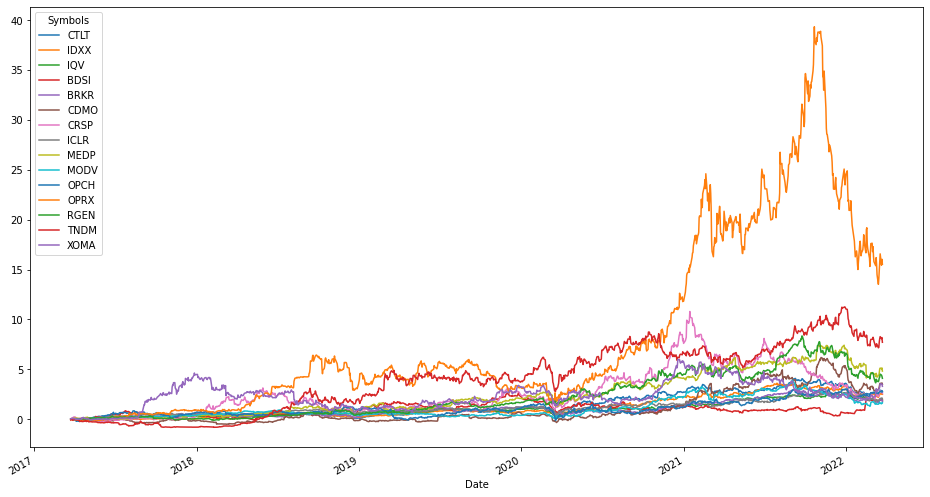

In [88]:
return_series_close.plot(figsize=(16,9))

In [89]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [90]:
highest.dropna(axis=1, how="all")

Symbols,OPRX,TNDM
Date,,
2017-03-23,NaN,NaN
2017-03-24,NaN,NaN
2017-03-27,NaN,NaN
2017-03-28,NaN,NaN
2017-03-29,NaN,NaN
...,...,...
2022-03-17,NaN,NaN
2022-03-18,NaN,NaN
2022-03-21,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

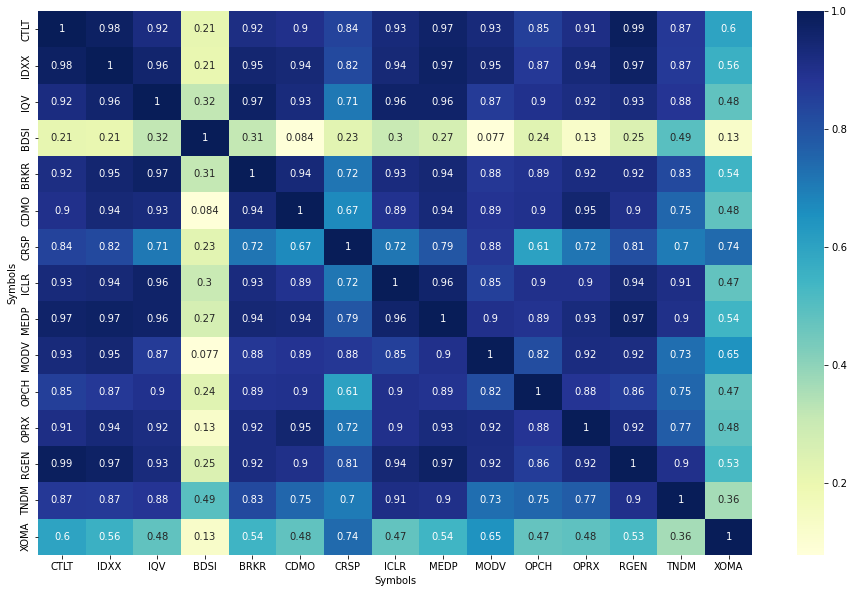

In [91]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [92]:
correlation = correlation[correlation < 0.1]
correlation

Symbols,CTLT,IDXX,IQV,BDSI,BRKR,CDMO,CRSP,ICLR,MEDP,MODV,OPCH,OPRX,RGEN,TNDM,XOMA
Symbols,,,,,,,,,,,,,,,
CTLT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IDXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IQV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BDSI,NaN,NaN,NaN,NaN,NaN,0.083839,NaN,NaN,NaN,0.0773,NaN,NaN,NaN,NaN,NaN
BRKR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDMO,NaN,NaN,NaN,0.083839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ICLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MEDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF for Healthcare

In [93]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [94]:
indexes = []
for i in range(len(df2_healthcare)):
    each = df2_healthcare.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [95]:
chosen_healthcare_df = df2_healthcare.iloc[indexes]
chosen_healthcare_df #15 stocks for healthcare sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.859
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.904
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.779
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.560,0.091710,5.493052e+08,...,0.290,0.2500,16.848484,19.172415,5.887818e+00,999.00,0.121310,0.565891,0.246627,0.609
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,5.270151e+01,999.00,0.168718,0.333862,0.242053,0.729
310,CDMO,"Avid Bioservices, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,19.645,0.146303,1.209769e+09,...,0.136,0.1500,61.390630,144.448530,9.822500e+00,999.00,0.298786,0.688251,0.654617,0.834
351,CRSP,CRISPR Therapeutics AG,Healthcare,Increase,Above Fair Price,UnderValued,No Data,55.660,0.147264,4.259493e+09,...,5.263,-2.0040,-7.906250,10.575717,-8.200419e+00,999.00,0.272043,0.649606,0.295733,0.684
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,2.414215e+02,999.00,0.124956,0.296964,0.223068,0.824
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.030,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,6.580331e+01,999.00,0.179658,0.498130,0.345048,0.938
651,MODV,ModivCare Inc.,Healthcare,Increase,Below Fair Price,OverValued,No Data,101.510,0.209990,1.421120e+09,...,1.594,0.6845,13.552737,63.682560,1.575569e+03,999.00,0.090920,0.383729,0.202971,0.644


In [96]:
chosen_healthcare_df.to_csv("selected_stocks_healthcare.csv")

# Real Estate Sector

## Filtering Stocks based on Sharpe Ratio

In [98]:
sharpe_list = []
for i in range(len(df_real_estate)):
    each = df_real_estate.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [99]:
sharpe_list

[0.149, 0.653, 0.563, 0.812, 0.347, 0.802, 0.368, 0.433, -0.088, 0.16, 0.764]

In [100]:
df_real_estate["sharpe"] = sharpe_list
df_real_estate

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_15020/2010124219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_estate["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.005,0.052115,1.890183e+10,...,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426,0.149
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.653
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.563
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.812
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.580,0.133822,1.705837e+09,...,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533,0.347
416,EXPI,"eXp World Holdings, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,25.150,0.156613,3.710555e+09,...,0.467,0.1000,36.985294,53.854390,8.428719,999.00,0.397249,NaN,NaN,0.802
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.090,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.368
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.850,0.167806,1.112110e+10,...,3.689,0.0300,23.422174,29.777718,20.371571,16.28,0.194245,0.413550,0.128521,0.433
614,LSEA,Landsea Homes Corporation,Real Estate,Increase,Below Fair Price,UnderValued,No Data,6.560,-0.037662,3.036040e+08,...,0.531,0.4860,4.315790,12.354049,32.942956,999.00,0.036218,NaN,NaN,-0.088
906,UNIT,Uniti Group Inc.,Real Estate,Increase,Below Fair Price,UnderValued,No Data,11.085,-0.039440,2.616847e+09,...,0.171,0.3400,17.879032,64.824560,21.946654,999.00,0.146837,0.546158,-0.087307,0.160


In [101]:
df2_real_estate = df_real_estate[df_real_estate["sharpe"] > 0.6]
df2_real_estate

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.653
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.812
416,EXPI,"eXp World Holdings, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,25.15,0.156613,3.710555e+09,...,0.467,0.1000,36.985294,53.854390,8.428719,999.00,0.397249,NaN,NaN,0.802
937,SAFE,Safehold Inc.,Real Estate,Increase,Below Fair Price,OverValued,No Data,60.47,0.133037,3.420177e+09,...,1.261,0.3690,34.752872,47.954006,145.164511,999.00,-0.016052,NaN,NaN,0.764


## Correlation between Stocks

In [102]:
returns_list = []
for i in range(len(df2_real_estate)):
    each = df2_real_estate.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [103]:
returns_list

[Symbols         CBRE
 Date                
 2017-03-23       NaN
 2017-03-24 -0.016309
 2017-03-27 -0.035765
 2017-03-28 -0.027468
 2017-03-29 -0.018026
 ...              ...
 2022-03-17  1.605150
 2022-03-18  1.606295
 2022-03-21  1.582832
 2022-03-22  1.620315
 2022-03-23  1.555937
 
 [1260 rows x 1 columns],
 Symbols         SBAC
 Date                
 2017-03-23       NaN
 2017-03-24  0.001354
 2017-03-27 -0.002793
 2017-03-28  0.003555
 2017-03-29  0.013968
 ...              ...
 2022-03-17  1.794125
 2022-03-18  1.798866
 2022-03-21  1.773216
 2022-03-22  1.731990
 2022-03-23  1.712944
 
 [1260 rows x 1 columns]]

In [104]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,CBRE,SBAC
Date,,
2017-03-23,NaN,NaN
2017-03-24,-0.016309,0.001354
2017-03-27,-0.035765,-0.002793
2017-03-28,-0.027468,0.003555
2017-03-29,-0.018026,0.013968
...,...,...
2022-03-17,1.605150,1.794125
2022-03-18,1.606295,1.798866
2022-03-21,1.582832,1.773216


<AxesSubplot:xlabel='Date'>

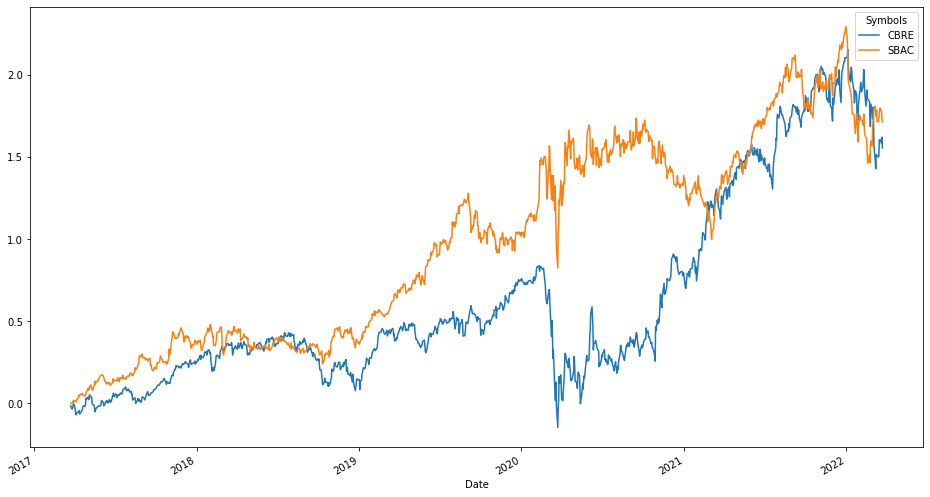

In [105]:
return_series_close.plot(figsize=(16,9))

In [106]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [107]:
highest.dropna(axis=1, how="all")

Symbols
Date
2017-03-23
2017-03-24
2017-03-27
2017-03-28
2017-03-29
...
2022-03-17
2022-03-18
2022-03-21


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

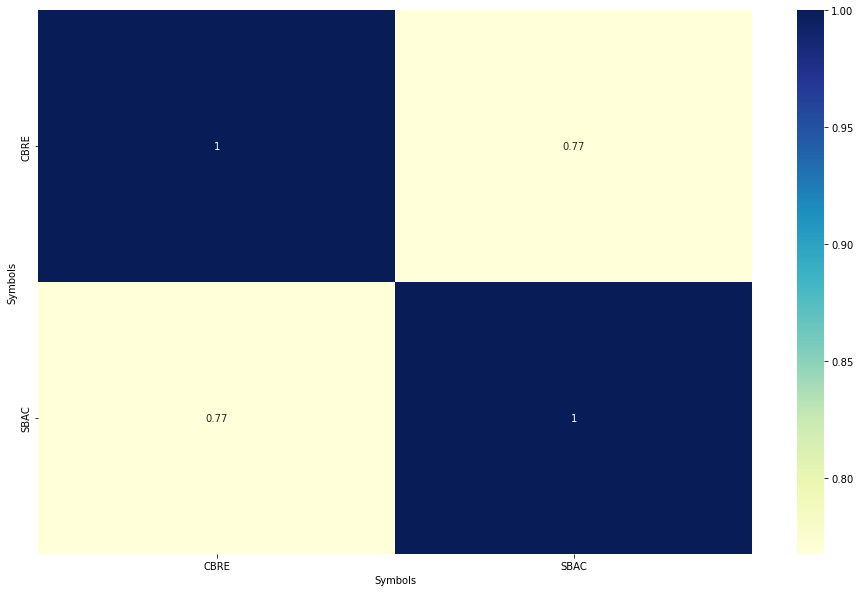

In [108]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [109]:
correlation = correlation[correlation < 0.1]
correlation

Symbols,CBRE,SBAC
Symbols,,
CBRE,NaN,NaN
SBAC,NaN,NaN


## Final DF for Real Estate

In [110]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [111]:
indexes = []
for i in range(len(df2_real_estate)):
    each = df2_real_estate.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [112]:
chosen_realestate_df = df2_real_estate.iloc[indexes]
chosen_realestate_df #2 stocks for real estate sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.653
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.812


In [113]:
chosen_realestate_df.to_csv("selected_stocks_realestate.csv")

# Industrials Sector

## Filtering Stocks based on Sharpe Ratio

In [114]:
sharpe_list = []
for i in range(len(df_industrials)):
    each = df_industrials.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [115]:
sharpe_list

[-0.026,
 0.402,
 0.762,
 0.735,
 0.36,
 0.389,
 0.489,
 0.242,
 0.326,
 0.62,
 0.33,
 0.733,
 0.729,
 0.477,
 0.722,
 -0.036,
 1.231,
 0.516,
 0.402,
 0.311,
 0.663,
 0.51,
 0.18,
 0.246,
 0.213,
 0.717,
 0.036,
 0.382,
 0.095,
 0.874,
 -0.027,
 0.458,
 0.182,
 -0.292,
 0.321,
 0.232,
 0.355,
 0.214,
 0.451,
 0.649,
 0.557,
 0.318,
 0.474,
 0.307,
 0.602,
 -0.058,
 0.771,
 0.521,
 0.353,
 0.214,
 0.694,
 -0.174,
 0.446,
 0.199,
 0.653,
 0.349,
 0.807,
 0.404,
 0.453,
 0.093,
 0.565,
 -0.177,
 0.017,
 0.731,
 0.263,
 0.249,
 0.414,
 0.557,
 0.592,
 0.414,
 0.433,
 0.249,
 0.616,
 0.686,
 0.496,
 0.224,
 0.568,
 0.216,
 0.523,
 1.064,
 0.644,
 0.211,
 0.105,
 -0.094,
 0.567,
 1.035,
 0.369,
 0.193,
 0.432,
 0.633,
 0.39,
 0.289,
 0.487]

In [116]:
df_industrials["sharpe"] = sharpe_list
df_industrials

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_15020/77830193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrials["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043,-0.026
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.402
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.762
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.735
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.0900,0.030170,4.869738e+08,...,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257,0.432
908,USAK,"USA Truck, Inc.",Industrials,Increase,Below Fair Price,UnderValued,No Data,24.0400,0.108008,2.136505e+08,...,2.057,0.2760,9.246155,11.686924,30.639383,999.00,0.273259,0.638308,0.234642,0.633
918,VRRM,Verra Mobility Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,17.2700,0.056159,2.695225e+09,...,0.058,0.3080,18.178947,297.758640,27.507524,999.00,0.196676,NaN,NaN,0.390
920,VSEC,VSE Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,47.3300,0.148449,6.016543e+08,...,0.633,0.1960,12.198454,74.770935,33.682675,999.00,0.199108,0.472182,0.061138,0.289


In [117]:
df2_industrials = df_industrials[df_industrials["sharpe"] > 0.6]
df2_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.28,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.762
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.16,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.735
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.32,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.620
107,IR,Ingersoll Rand Inc.,Industrials,Increase,Above Fair Price,UnderValued,No Data,53.31,0.123299,2.172836e+10,...,0.987,0.2177,23.077923,54.012160,44.602674,999.00,0.197892,NaN,NaN,0.733
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.31,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.729
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.65,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.722
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.86,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.231
207,URI,"United Rentals, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,311.82,0.221984,2.257402e+10,...,16.534,0.2123,12.180469,18.859320,250.659605,18.26,0.251378,0.445386,0.191018,0.663
245,ARCB,ArcBest Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,85.22,0.173652,2.178930e+09,...,6.407,0.3300,9.532439,13.301077,157.723259,999.00,0.219773,0.506692,0.230508,0.717
297,CAR,"Avis Budget Group, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,152.02,0.278948,8.581165e+09,...,11.807,0.2750,7.791902,12.875413,192.389708,999.00,0.270827,0.807664,0.347936,0.874


## Correlation between Stocks

In [118]:
returns_list = []
for i in range(len(df2_industrials)):
    each = df2_industrials.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [119]:
returns_list

[Symbols          AME
 Date                
 2017-03-23       NaN
 2017-03-24 -0.000748
 2017-03-27  0.000748
 2017-03-28  0.008792
 2017-03-29  0.013655
 ...              ...
 2022-03-17  1.483165
 2022-03-18  1.520763
 2022-03-21  1.519454
 2022-03-22  1.518144
 2022-03-23  1.479424
 
 [1260 rows x 1 columns],
 Symbols          CAT
 Date                
 2017-03-23       NaN
 2017-03-24 -0.000867
 2017-03-27 -0.007807
 2017-03-28  0.007807
 2017-03-29  0.006831
 ...              ...
 2022-03-17  1.403773
 2022-03-18  1.395208
 2022-03-21  1.425567
 2022-03-22  1.414724
 2022-03-23  1.408869
 
 [1260 rows x 1 columns],
 Symbols          GWW
 Date                
 2017-03-23       NaN
 2017-03-24 -0.004571
 2017-03-27 -0.013548
 2017-03-28 -0.005984
 2017-03-29 -0.011969
 ...              ...
 2022-03-17  1.069941
 2022-03-18  1.085983
 2022-03-21  1.103894
 2022-03-22  1.089183
 2022-03-23  1.097910
 
 [1260 rows x 1 columns],
 Symbols            J
 Date                
 2017-03-23   

In [120]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,AME,CAT,GWW,J,LHX,ODFL,URI,ARCB,CAR,ESEA,...,HSON,ISSC,KRNT,MGRC,QRHC,RCII,SAIA,SBLK,TRNS,USAK
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-24,-0.000748,-0.000867,-0.004571,-0.011505,-0.004757,-0.006449,-0.001076,-0.007843,-0.003151,0.014493,...,0.026549,-0.009804,0.002785,-0.005786,0.023810,0.016018,-0.001170,0.022335,0.071918,-0.001372
2017-03-27,0.000748,-0.007807,-0.013548,-0.019357,-0.005654,-0.008677,-0.010429,-0.003922,-0.011555,-0.014493,...,0.061947,-0.009804,-0.008357,-0.003654,0.066667,0.037757,-0.001170,0.027411,0.070205,0.010974
2017-03-28,0.008792,0.007807,-0.005984,-0.010409,0.002423,0.008560,0.020030,0.013726,0.001050,0.028985,...,0.106195,-0.019608,0.002785,0.011876,0.047619,0.041190,0.035088,0.188832,0.061644,0.023320
2017-03-29,0.013655,0.006831,-0.011969,0.006392,-0.002603,0.001642,0.023341,0.021569,0.019258,0.079710,...,0.159292,-0.003268,0.044568,0.014312,0.080952,0.052632,0.030409,0.184772,0.083048,0.012346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,1.483165,1.403773,1.069941,1.520636,1.232903,4.677416,1.870137,2.595294,9.434174,1.749094,...,1.943363,1.470588,3.667966,1.614190,2.180952,2.116705,5.603743,1.938071,5.748287,2.076818
2022-03-18,1.520763,1.395208,1.085983,1.578890,1.211901,4.774507,1.865751,2.658431,8.913516,1.690217,...,2.000000,1.555556,3.896936,1.584044,2.195238,2.163616,5.830877,1.973604,5.706336,2.122085
2022-03-21,1.519454,1.425567,1.103894,1.554602,1.278406,4.624824,1.878662,2.568235,8.510855,1.763587,...,2.042478,1.718954,3.649582,1.594702,1.990476,2.018307,5.576375,2.004061,5.612158,2.111111


<AxesSubplot:xlabel='Date'>

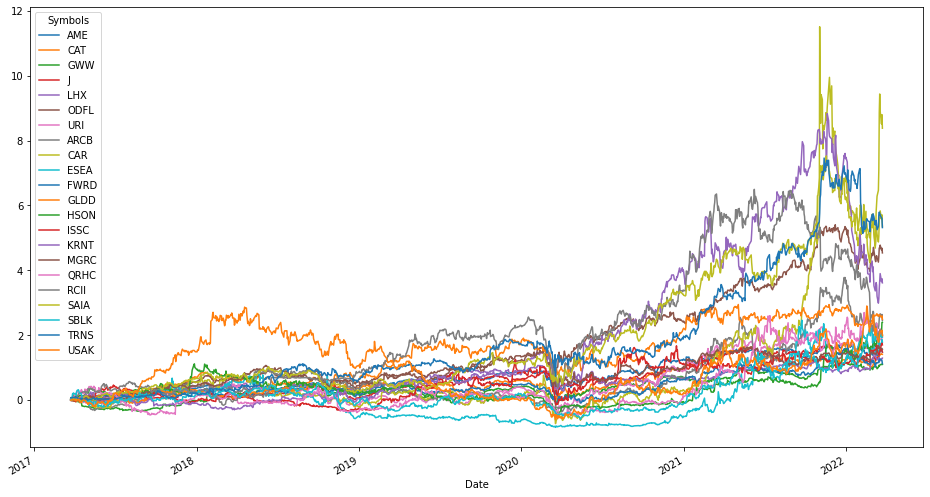

In [121]:
return_series_close.plot(figsize=(16,9))

In [122]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [123]:
highest.dropna(axis=1, how="all")

Symbols,CAR,SAIA,TRNS
Date,,,
2017-03-23,NaN,NaN,NaN
2017-03-24,NaN,NaN,NaN
2017-03-27,NaN,NaN,NaN
2017-03-28,NaN,NaN,NaN
2017-03-29,NaN,NaN,NaN
...,...,...,...
2022-03-17,NaN,NaN,NaN
2022-03-18,NaN,NaN,NaN
2022-03-21,NaN,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

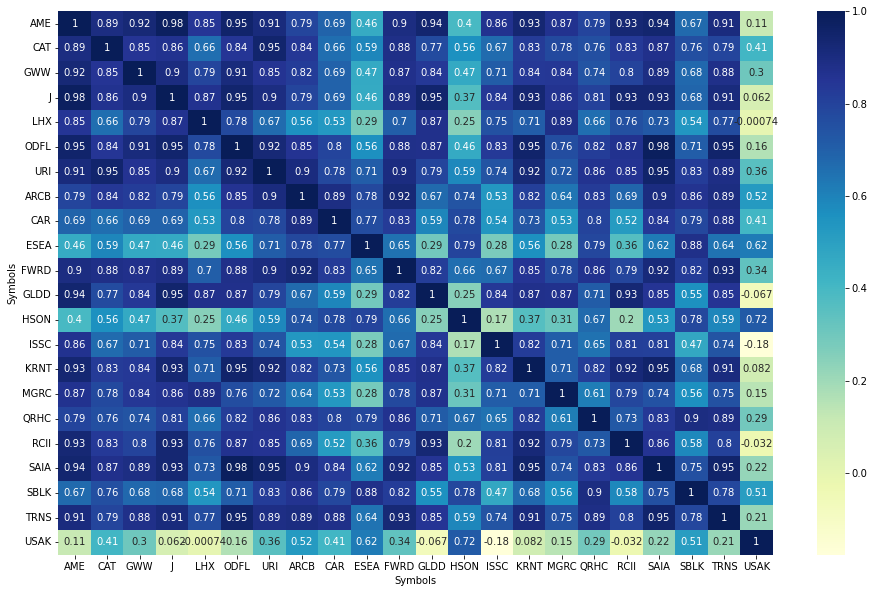

In [124]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [125]:
correlation = correlation[correlation < 0.1]
correlation

Symbols,AME,CAT,GWW,J,LHX,ODFL,URI,ARCB,CAR,ESEA,...,HSON,ISSC,KRNT,MGRC,QRHC,RCII,SAIA,SBLK,TRNS,USAK
Symbols,,,,,,,,,,,,,,,,,,,,,
AME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GWW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061898
LHX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000739
ODFL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARCB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF for Industrials

In [126]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [127]:
indexes = []
for i in range(len(df2_industrials)):
    each = df2_industrials.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [128]:
chosen_industrials_df = df2_industrials.iloc[indexes]
chosen_industrials_df #22 stocks for industrials sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.28,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.762
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.16,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.735
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.32,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.620
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.31,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.729
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.65,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.722
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.86,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.231
207,URI,"United Rentals, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,311.82,0.221984,2.257402e+10,...,16.534,0.2123,12.180469,18.859320,250.659605,18.26,0.251378,0.445386,0.191018,0.663
245,ARCB,ArcBest Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,85.22,0.173652,2.178930e+09,...,6.407,0.3300,9.532439,13.301077,157.723259,999.00,0.219773,0.506692,0.230508,0.717
297,CAR,"Avis Budget Group, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,152.02,0.278948,8.581165e+09,...,11.807,0.2750,7.791902,12.875413,192.389708,999.00,0.270827,0.807664,0.347936,0.874
410,ESEA,Euroseas Ltd.,Industrials,Increase,Above Fair Price,UnderValued,No Data,26.80,-0.182789,1.941630e+08,...,2.966,0.0500,2.286689,9.035738,5.909189,999.00,0.065392,0.931402,0.144480,0.649


In [129]:
chosen_industrials_df.to_csv("selected_stocks_industrials.csv")

# Consumer Cyclical Sector

## Filtering Stocks based on Sharpe Ratio

In [130]:
sharpe_list = []
for i in range(len(df_consumer_c)):
    each = df_consumer_c.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [131]:
sharpe_list

[0.338,
 0.463,
 0.628,
 0.431,
 0.393,
 0.099,
 0.697,
 0.431,
 0.468,
 0.6,
 0.507,
 0.146,
 0.318,
 1.24,
 0.181,
 0.245,
 0.158,
 0.038,
 0.299,
 0.159,
 0.136,
 0.214,
 0.064,
 0.108,
 0.863,
 0.224,
 0.912,
 0.439,
 0.405,
 0.162,
 0.456,
 0.493,
 0.565,
 0.436,
 0.284,
 0.082,
 0.3,
 0.783,
 0.737,
 0.331,
 0.625,
 0.369,
 0.728,
 0.155,
 0.395,
 0.348,
 0.518,
 -0.131,
 0.379,
 0.005,
 0.514,
 0.169,
 0.533,
 0.168,
 0.962,
 0.622,
 0.415,
 0.658,
 0.089,
 -0.025,
 0.38,
 0.41,
 0.046,
 0.705,
 0.655,
 0.331,
 0.398,
 0.444,
 0.358,
 0.431,
 0.229,
 0.478,
 0.093,
 0.221,
 0.486,
 0.247,
 0.238,
 0.238,
 0.209]

In [132]:
df_consumer_c["sharpe"] = sharpe_list
df_consumer_c

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_15020/4197417276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consumer_c["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,9.550,0.1525,13.932986,22.424082,1.091882e+02,12.97,0.171149,0.355467,0.049267,0.338
21,APTV,Aptiv PLC,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,139.9800,0.197323,3.786655e+10,...,2.941,0.4626,30.364424,47.596054,6.093763e+02,13.49,0.274474,0.428095,0.175759,0.463
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.628
80,F,Ford Motor Company,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,17.4300,0.074129,6.965446e+10,...,0.713,0.7767,8.758794,24.446003,4.370325e+02,29.57,0.150484,0.375582,0.108521,0.431
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.8900,0.103717,1.778708e+10,...,5.609,0.0460,17.202478,22.266000,2.660739e+01,12.53,0.150484,0.294242,0.076618,0.393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,TXRH,"Texas Roadhouse, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,87.7900,0.199828,6.114135e+09,...,3.020,0.8417,24.251383,29.069536,3.041617e+03,999.00,0.145622,0.401041,0.159949,0.486
907,URBN,"Urban Outfitters, Inc.",Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,25.3600,-0.015427,2.482336e+09,...,2.987,3.1615,8.128205,8.490124,1.349236e+06,999.00,0.203970,0.503745,0.001591,0.247
910,VC,Visteon Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,131.3900,0.155275,3.678473e+09,...,0.984,0.9518,30.204597,133.526410,7.676611e+03,999.00,0.268396,0.463500,0.066498,0.238
917,VRA,"Vera Bradley, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,7.7900,-0.141295,2.627583e+08,...,0.607,0.1630,10.116883,12.833608,4.309673e+00,999.00,0.240438,0.593731,-0.064284,0.238


In [133]:
df2_consumer_c = df_consumer_c[df_consumer_c["sharpe"] > 0.6]
df2_consumer_c

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.628
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.697
199,TSLA,"Tesla, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,806.0500,0.609586,8.094838e+11,...,3.062,0.7295,92.014840,263.242980,1.586122e+04,28.54,0.267181,0.611157,0.739589,1.240
321,CHDN,"Churchill Downs, Incorporated",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,214.5100,0.285760,8.204814e+09,...,5.574,2.0990,23.598460,38.484030,8.037688e+05,999.00,0.165071,0.428761,0.357716,0.863
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.912
437,FIVE,"Five Below, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,159.6400,0.196712,8.943895e+09,...,4.662,0.4612,27.242321,34.242813,6.889982e+02,999.00,0.178443,0.452922,0.332526,0.783
442,FLL,"Full House Resorts, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,8.7500,0.119495,2.994906e+08,...,0.331,0.1500,19.444445,26.435045,4.375000e+00,999.00,0.240438,0.704348,0.296359,0.737
447,FNKO,"Funko, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,17.1200,0.092467,6.835999e+08,...,1.037,0.0270,11.972029,16.509163,3.092625e+00,999.00,0.293924,NaN,NaN,0.625
452,FOXF,Fox Factory Holding Corp.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,120.9000,0.205780,5.090374e+09,...,3.731,0.1500,23.613281,32.404182,6.045000e+01,999.00,0.230713,0.462622,0.367678,0.728
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,3.964841e+02,16.06,0.179658,0.392863,0.361296,0.962


## Correlation between Stocks

In [134]:
returns_list = []
for i in range(len(df2_consumer_c)):
    each = df2_consumer_c.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [135]:
returns_list

[Symbols          DHI
 Date                
 2017-03-23       NaN
 2017-03-24 -0.000902
 2017-03-27 -0.006015
 2017-03-28  0.000602
 2017-03-29  0.003609
 ...              ...
 2022-03-17  1.502256
 2022-03-18  1.578647
 2022-03-21  1.493835
 2022-03-22  1.489925
 2022-03-23  1.362105
 
 [1260 rows x 1 columns],
 Symbols          HLT
 Date                
 2017-03-23       NaN
 2017-03-24 -0.000171
 2017-03-27 -0.008059
 2017-03-28  0.006001
 2017-03-29  0.004973
 ...              ...
 2022-03-17  1.591564
 2022-03-18  1.602709
 2022-03-21  1.578018
 2022-03-22  1.596365
 2022-03-23  1.544753
 
 [1260 rows x 1 columns],
 Symbols          TSLA
 Date                 
 2017-03-23        NaN
 2017-03-24   0.032891
 2017-03-27   0.060601
 2017-03-28   0.088979
 2017-03-29   0.088704
 ...               ...
 2022-03-17  16.104952
 2022-03-18  16.768074
 2022-03-21  17.077556
 2022-03-22  18.506632
 2022-03-23  18.607307
 
 [1260 rows x 1 columns],
 Symbols         CHDN
 Date                
 

In [136]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,DHI,HLT,TSLA,CHDN,CLAR,FIVE,FLL,FOXF,LULU,MBUU,MCRI,RICK,RUSHA
Date,,,,,,,,,,,,,
2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-24,-0.000902,-0.000171,0.032891,-0.002582,2.830199e-02,0.008757,4.237284e-03,0.030741,0.009670,0.028109,-0.006885,0.000000,-0.009922
2017-03-27,-0.006015,-0.008059,0.060601,0.002904,3.773583e-02,0.007811,-1.110223e-16,0.041591,0.016328,0.012863,0.007229,-0.007139,-0.022946
2017-03-28,0.000602,0.006001,0.088979,0.019361,1.886805e-02,0.022012,-4.237284e-03,0.037975,0.009512,0.050024,0.005164,-0.017252,-0.004961
2017-03-29,0.003609,0.004973,0.088704,0.021297,2.220446e-16,0.049941,2.542381e-02,0.036166,0.051046,0.064316,0.020998,-0.019631,0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,1.502256,1.591564,16.104952,3.384511,3.599747e+00,2.867692,3.194915e+00,2.794937,3.876347,1.853740,1.939759,2.730518,1.495349
2022-03-18,1.578647,1.602709,16.768074,3.531655,3.569498e+00,2.885680,3.508475e+00,2.901627,4.024255,1.919962,1.974183,2.815586,1.463721
2022-03-21,1.493835,1.578018,17.077556,3.417812,3.495766e+00,2.866035,3.385594e+00,2.802893,3.886176,1.922820,1.918761,2.741821,1.468372


<AxesSubplot:xlabel='Date'>

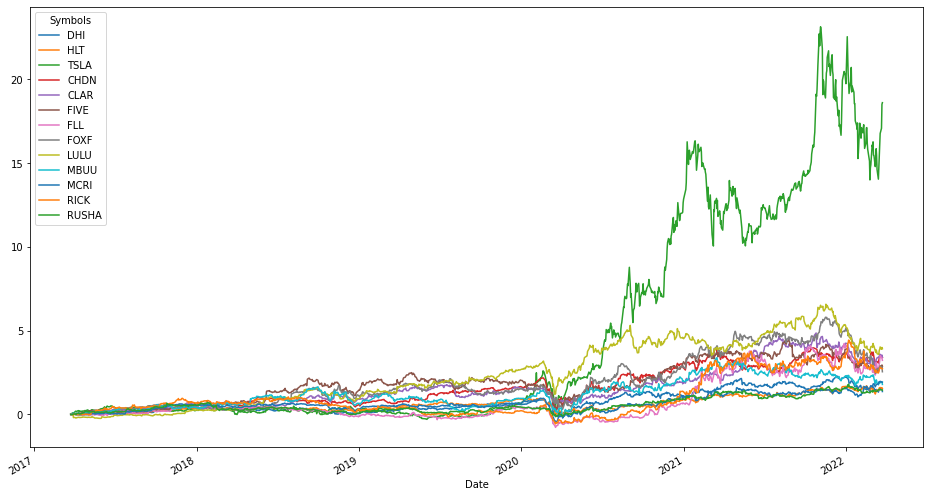

In [137]:
return_series_close.plot(figsize=(16,9))

In [138]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [139]:
highest.dropna(axis=1, how="all")

Symbols,TSLA
Date,
2017-03-23,NaN
2017-03-24,NaN
2017-03-27,NaN
2017-03-28,NaN
2017-03-29,NaN
...,...
2022-03-17,NaN
2022-03-18,NaN
2022-03-21,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

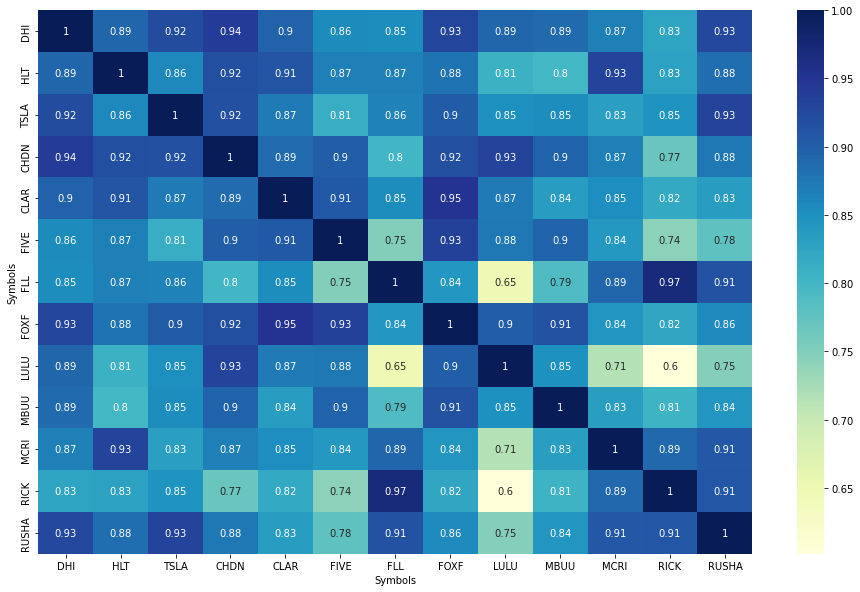

In [140]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [141]:
correlation = correlation[correlation < 0.1]
correlation

Symbols,DHI,HLT,TSLA,CHDN,CLAR,FIVE,FLL,FOXF,LULU,MBUU,MCRI,RICK,RUSHA
Symbols,,,,,,,,,,,,,
DHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HLT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHDN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FOXF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LULU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF for Consumer Cyclical

In [142]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [143]:
indexes = []
for i in range(len(df2_consumer_c)):
    each = df2_consumer_c.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [144]:
chosen_consumer_c_df = df2_consumer_c.iloc[indexes]
chosen_consumer_c_df #13 stocks for consumer cyclical sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.628
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.697
199,TSLA,"Tesla, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,806.0500,0.609586,8.094838e+11,...,3.062,0.7295,92.014840,263.242980,1.586122e+04,28.54,0.267181,0.611157,0.739589,1.240
321,CHDN,"Churchill Downs, Incorporated",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,214.5100,0.285760,8.204814e+09,...,5.574,2.0990,23.598460,38.484030,8.037688e+05,999.00,0.165071,0.428761,0.357716,0.863
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.912
437,FIVE,"Five Below, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,159.6400,0.196712,8.943895e+09,...,4.662,0.4612,27.242321,34.242813,6.889982e+02,999.00,0.178443,0.452922,0.332526,0.783
442,FLL,"Full House Resorts, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,8.7500,0.119495,2.994906e+08,...,0.331,0.1500,19.444445,26.435045,4.375000e+00,999.00,0.240438,0.704348,0.296359,0.737
452,FOXF,Fox Factory Holding Corp.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,120.9000,0.205780,5.090374e+09,...,3.731,0.1500,23.613281,32.404182,6.045000e+01,999.00,0.230713,0.462622,0.367678,0.728
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,3.964841e+02,16.06,0.179658,0.392863,0.361296,0.962
625,MBUU,"Malibu Boats, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,67.3700,0.142686,1.403971e+09,...,5.497,0.1500,8.715395,12.255775,3.368500e+01,999.00,0.229497,0.490083,0.277316,0.622


In [145]:
chosen_consumer_c_df.to_csv("selected_stocks_consumer_c.csv")